# Übung 8

## 1 Müllmenge - Teil 2

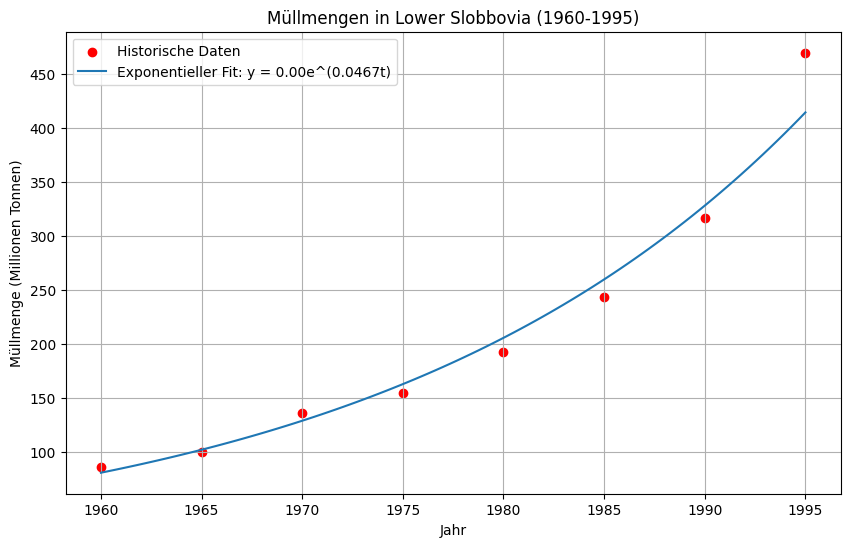

Optimale Parameter: a = 0.046697, c = 0.000000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Daten
years = np.array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995])
y = np.array([86.0, 99.8, 135.8, 155.0, 192.6, 243.1, 316.3, 469.5])

# Logarithmiere die y-Werte
z = np.log(y)

# Erstelle Design-Matrix
X = np.column_stack([np.ones_like(years), years])

# Berechne OLS-Schätzer
beta = np.linalg.inv(X.T @ X) @ X.T @ z
b, a = beta

# Berechne c aus b (da b = ln(c))
c = np.exp(b)

# Erstelle Fit-Werte
years_fit = np.linspace(1960, 1995, 100)
y_fit = c * np.exp(a * years_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, y, color='red', label='Historische Daten')
plt.plot(years_fit, y_fit, label=f'Exponentieller Fit: y = {c:.2f}e^({a:.4f}t)')
plt.xlabel('Jahr')
plt.ylabel('Müllmenge (Millionen Tonnen)')
plt.title('Müllmengen in Lower Slobbovia (1960-1995)')
plt.legend()
plt.grid(True)
plt.show()

# Ausgabe der Parameter
print(f"Optimale Parameter: a = {a:.6f}, c = {c:.6f}")

## 2 Polynomiale Regression

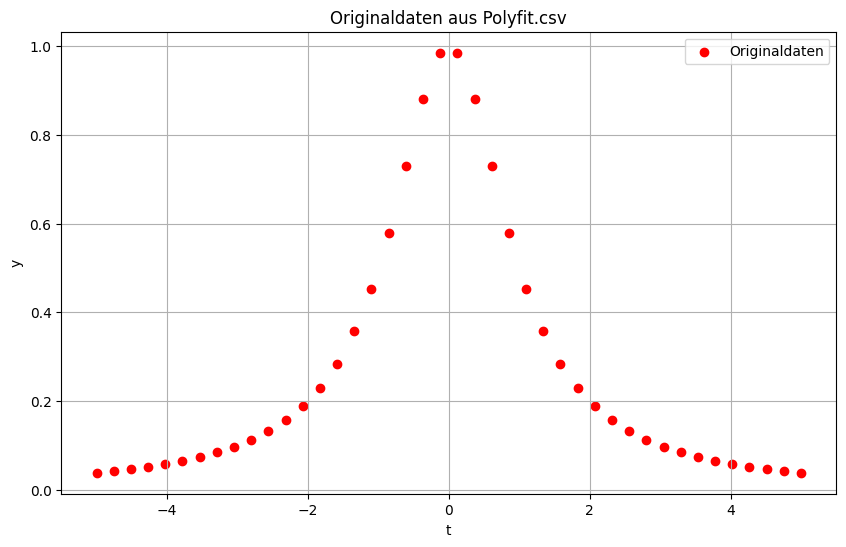

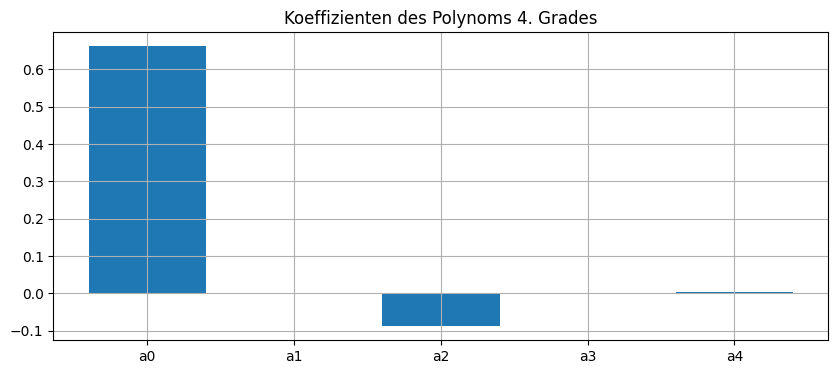

Koeffizienten (a0 bis a4): [ 6.61640132e-01 -4.42354486e-17 -8.79185293e-02  1.34859272e-18
  2.73527179e-03]

Die ungeraden Koeffizienten (a1, a3) sind null, weil die Daten symmetrisch
um t=0 sind (gerade Funktion). Ein Polynom, das eine gerade Funktion beschreibt,
hat nur gerade Potenzen (t^0, t^2, t^4, etc.).


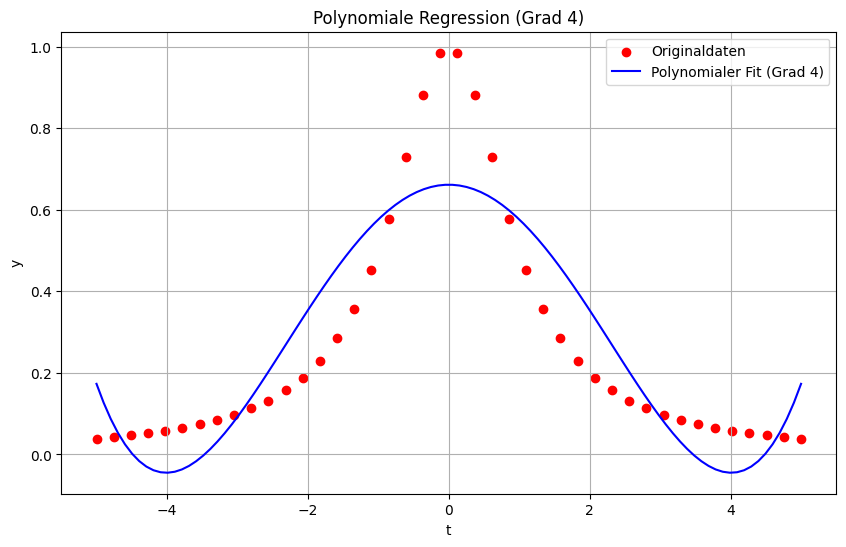


Vergleich der Koeffizienten:
lstsq Methode: [ 6.61640132e-01 -4.42354486e-17 -8.79185293e-02  1.34859272e-18
  2.73527179e-03]
polyfit Methode: [ 6.61640132e-01 -2.36020348e-17 -8.79185293e-02  6.75959307e-18
  2.73527179e-03]


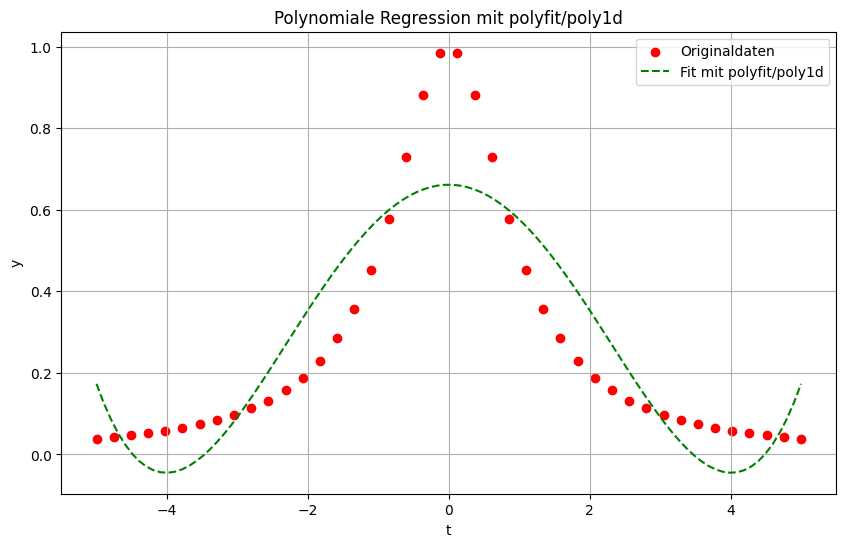

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Daten laden und plotten
# Da die Datei im gleichen Ordner ist, können wir den relativen Pfad verwenden
D = np.genfromtxt('Polyfit.csv', delimiter=';')
t = D[:, 0]
y = D[:, 1]

# Plot der Originaldaten
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='red', label='Originaldaten')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Originaldaten aus Polyfit.csv')
plt.grid(True)
plt.legend()
plt.show()

## 2. Polynomiale Regression (Grad 4) mit lstsq
# Design-Matrix für Polynom 4. Grades erstellen
X = np.column_stack([t**i for i in range(5)])

# Least Squares Lösung
coefficients, residuals, rank, singular_values = np.linalg.lstsq(X, y, rcond=None)

# Koeffizienten plotten
plt.figure(figsize=(10, 4))
plt.bar(range(5), coefficients)
plt.xticks(range(5), ['a0', 'a1', 'a2', 'a3', 'a4'])
plt.title('Koeffizienten des Polynoms 4. Grades')
plt.grid(True)
plt.show()

print("Koeffizienten (a0 bis a4):", coefficients)

# Erklärung warum ungerade Koeffizienten null sind:
print("\nDie ungeraden Koeffizienten (a1, a3) sind null, weil die Daten symmetrisch")
print("um t=0 sind (gerade Funktion). Ein Polynom, das eine gerade Funktion beschreibt,")
print("hat nur gerade Potenzen (t^0, t^2, t^4, etc.).")

## 3. Plot mit Originaldaten und Fit
# Werte für den Fit berechnen
t_fit = np.linspace(min(t), max(t), 100)
X_fit = np.column_stack([t_fit**i for i in range(5)])
y_fit = X_fit @ coefficients

plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='red', label='Originaldaten')
plt.plot(t_fit, y_fit, 'b-', label='Polynomialer Fit (Grad 4)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Polynomiale Regression (Grad 4)')
plt.grid(True)
plt.legend()
plt.show()

## 4. Lösung mit numpy.polyfit und numpy.poly1d
# Polynom mit polyfit fitten
coefficients_polyfit = np.polyfit(t, y, 4)

# Polynom-Funktion erstellen
poly = np.poly1d(coefficients_polyfit)

# Werte für den Fit berechnen
y_fit_poly = poly(t_fit)

# Ergebnisse vergleichen
print("\nVergleich der Koeffizienten:")
print("lstsq Methode:", coefficients)
print("polyfit Methode:", coefficients_polyfit[::-1])  # Umgekehrte Reihenfolge wegen poly1d Konvention

# Plot mit polyfit/poly1d Lösung
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='red', label='Originaldaten')
plt.plot(t_fit, y_fit_poly, 'g--', label='Fit mit polyfit/poly1d')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Polynomiale Regression mit polyfit/poly1d')
plt.grid(True)
plt.legend()
plt.show()